# Hot Ones - Game Show Strategy, Hot Sauce Review, and Hot Sauce Ingredient Inspection



https://www.youtube.com/watch?v=1vzU_yMu4XE&embeds_euri=https%3A%2F%2Fwww.argusleader.com%2F&embeds_origin=https%3A%2F%2Fwww.argusleader.com&feature=emb_logo

## Motivation - "Hot Questions, Hotter Wings"

**Hot Ones** is a YouTube famous interview program. The show stands out as an interview program because of the level of care and research that goes into its questions. The guests are treated as real people, and the questions are thoughtful, fun, individualized, and personal.

The "catch" of the show is that these celebrities are asked this questions while eating 10 chicken (or vegan/plant-based) wings covered in hot sauce of increasing spiciness. Guests often become more vulnerable and sincere when inundated with "heat"

While it is arguable that at least a few of the sauces on the list are there for "pain" purposes alone, the sauces cover a huge range of flavor profiles with creative flavor combinations of different vegetables, fruits, vinegars, and spices - as well as varying scoville levels (scovile heat units [SHU] or scoville rating is a quatification of "heat" based on concentration of capsaicinoids - *Wikipedia*). If a hot sauce is unique, high quality, and/or extremely spicy - getting on this show is a major achievment. Thus, this analysis will assume that the hot sauces that appear on this program are ***the best of the best!***

Each season (currently 20 as of 3/25/2023) the list of hot sauces change, however many sauces/brands stay for a few seasons. **Hot Ones** also have a line of hot sauces that are featured each season (usually one "mild" and one very spicy sauce per season).

I love specialty hot sauces and even make my own. The motivation here was to analyze some of the best hot sauces for inspiration in my own hot sauce making, as well as to decide which sauces to buy and try next!

This exploritory analytics project is designed to investigate a few key topics:
1. How does SHU evolve with the order that the wings are served? 
2. What are the most popular sauces and brands used on the program?
3. Which peppers and/or ingredients are most common or unique among the hot sauces featured?

**Data**: https://www.saucemania.com.au/hot-sauce/a-complete-list-of-hot-ones-hot-sauces/

**Many of the hotsauce ingredient lists**: https://heatonist.com/?utm_source=google&utm_medium=cpc&utm_campaign=us_all_gs_ua_x_20230301_brand_purchase&utm_content=us_all_gs_kw_brand-SKAGheatonist_x_xx_purchase&utm_term=heatonist&gclid=Cj0KCQjwt_qgBhDFARIsABcDjOdxPC-EnemuphyUoO6Y6PDhcOwRSFh0ByyXEVoKaJ8IBMAl33XN2k8aAkWREALw_wcB

I started by taking this data table online to get the hot sauces from each season of the show, which includes the approximate scoville unit (SHU) and the order when the sauce appears during the interview. A few sauces have approximate (2,000,000+) or *TBA* values that were assigned 2,000,000 - as this value far exceeded the sauces that came before. In the analysis later SHU is best presented in a logarithmic scale, so splitting hairs on the exact SHU at this high end.

There does not appear to be a great repository for all of the ingredient lists of hot sauces. Given the short list of sauces (<150), web scraping would not have been ideal or necessarily worthwhile to design. Most were easy to find through Heatonist (link above), however perhaps a majority of them were individually Google searched. 

Ingredient lists are chaotic to say the least. There is little convention in spelling/plurality (*jalapeno*, *jalapeño*, vs. *jalapenos*), some ingredients have sub-ingredient lists, and peppers that have been fermented may be listed as a mash, e.g. "Habanero mash (habaneros, vinegar, salt)" - all leading to extremely tedious conditions that needed to be investigated on a case-by-case basis. As this is intended to just be a "for-fun" exploratory analysis, there are expected uncertainties present in this data - although there was a ton of care and patience to minimize that as much as reasonable/possible (too much if you ask me!)

# Load In Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_show = pd.read_csv('HotOnesSauces.csv') #show info
df_ingr = pd.read_csv('HotOnesSauces_Ingredients.csv') #ingredient lists
df_peppernames = pd.read_csv('PepperNames.csv') #list of how peppers appear in data
df_newpeppernames = pd.read_csv('NewPepperNames.csv') #ideal list of pepper names after cleaning

In [3]:
peppernames = df_peppernames['Pepper Names'].iloc[:].values
new_peppernames = df_newpeppernames['Pepper Names'].iloc[:].values

In [4]:
peppernames

array(['adobo', 'aji', 'aka', 'amarillo', 'anaheim', 'ancho', 'apollo',
       'arbol', 'bell', 'bhut', 'bhutlah', 'bird', 'bongo', 'bonnet',
       'bonnets', 'calabrian', 'capsicum', 'carolina', 'cayenne',
       'cherry', 'chipolte', 'chipotle', 'chipotles', 'chocolate',
       'datil', 'douglah', 'fatalli', 'fijian', 'fresno', 'ghost',
       'guajillo', 'habanero', 'habaneros', 'habañero', 'hatari',
       'jalapeno', 'jalapenos', 'jalapeño', 'jalapeños', 'jigsaw',
       'jolokia', 'manzano', 'pasilla', 'peach', 'pepperoncini',
       'pepperx', 'piquin', 'pot', 'primo', 'reaper', 'reapers',
       'scorpion', 'scotch', 'serrano', 'sivathei', 'tabasco', 'tepin'],
      dtype=object)

In [5]:
HotSauceNames = df_ingr['Hot Sauce'].iloc[:].values

In [6]:
df_show

Hot Sauce  Scoville Rating (SHU)  \
0                        Texas Pete Original Hot Sauce                    747   
1                           Cholula Original Hot Sauce                   3600   
2                      El Yucateco Caribbean Hot Sauce                   5790   
3    Lottie's Traditional Barbados Yellow Hot Peppe...                  15000   
4    Pain Is Good Batch #218 Louisiana Style Hot Sauce                  13000   
..                                                 ...                    ...   
195       Torchbearer Sauces Mushroom Mayhem Hot Sauce                  68000   
196             Angry Goat Dreams of Calypso Hot Sauce                 101000   
197                 Da' Bomb Beyond Insanity Hot Sauce                 135600   
198  Butterfly Bakery of Vermont Taco Vibes Only Ho...                 638000   
199             Hot Ones The Last Dab Apollo Hot Sauce                2000000   

     Order Served  Season  
0               1       1  
1               2       1  
2               3       1  
3               4       1  
4               5       1  
..            ...     ...  
195             6      20  
196             7      20  
197             8      20  
198             9      20  
199            10      20  

[200 rows x 4 columns]

In [7]:
df_ingr.head(5)

Hot Sauce          Brand Name  \
0  13 Angry Scorpions Jekyll & Hyde Scorpion Chip...  13 Angry Scorpions   
1                    Adoboloco Fiya! Fiya! Hot Sauce           Adoboloco   
2  Adoboloco Hawaiian Hot Sauce Hamajang Kiawe Sm...           Adoboloco   
3                   Adoboloco Island Wings Hot Sauce           Adoboloco   
4                     Adoboloco Kolohe Kid Hot Sauce           Adoboloco   

                                         Ingredients  
0  Moruga Scorpion peppers, Smoked Chipotle peppe...  
1  Apple cider vinegar, jalapeno, dried Trinidad ...  
2  Apple Cider Vinegar, Ghost Peppers, Habanero, ...  
3  Pineapple, chili pepper, red wine vinegar, hon...  
4  Apple Cider Vinegar, Ghost Peppers, Sea Salt, ...

In [8]:
df = df_show.merge(df_ingr, how='left',on='Hot Sauce') #add ingredients to main table

In [9]:
df

Hot Sauce  Scoville Rating (SHU)  \
0                        Texas Pete Original Hot Sauce                    747   
1                           Cholula Original Hot Sauce                   3600   
2                      El Yucateco Caribbean Hot Sauce                   5790   
3    Lottie's Traditional Barbados Yellow Hot Peppe...                  15000   
4    Pain Is Good Batch #218 Louisiana Style Hot Sauce                  13000   
..                                                 ...                    ...   
195       Torchbearer Sauces Mushroom Mayhem Hot Sauce                  68000   
196             Angry Goat Dreams of Calypso Hot Sauce                 101000   
197                 Da' Bomb Beyond Insanity Hot Sauce                 135600   
198  Butterfly Bakery of Vermont Taco Vibes Only Ho...                 638000   
199             Hot Ones The Last Dab Apollo Hot Sauce                2000000   

     Order Served  Season                   Brand Name  \
0               1       1                   Texas Pete   
1               2       1                      Cholula   
2               3       1                  El Yucateco   
3               4       1                     Lottie's   
4               5       1                 Spicin Foods   
..            ...     ...                          ...   
195             6      20           Torchbearer Sauces   
196             7      20        Angry Goat Pepper Co.   
197             8      20                     Da' Bomb   
198             9      20  Butterfly Bakery of Vermont   
199            10      20                     Hot Ones   

                                           Ingredients  
0    Vinegar, Aged Peppers (Peppers, Salt, Vinegar)...  
1    Water, Arbol Peppers, Piquin Peppers, Salt, Vi...  
2    Water, Habanero Chile (28%), Carrot, Salt, Spi...  
3    Water, Mustard Seed, Vinegar, Onion, Habanero,...  
4    Malt Vinegar, Habanero and Cayenne Peppers, Wa...  
..                                                 ...  
195  Red wine vinegar, tomato paste, water, habaner...  
196  Pineapple, Mango, Yellow Scotch Bonnets, Lime ...  
197  Habaneros (habaneros, salt), Chipotle Puree (c...  
198  Organic distilled white vinegar, red serrano, ...  
199  The Apollo Pepper, distilled vinegar, The Apol...  

[200 rows x 6 columns]

In [10]:
# Since Scoville units scale quite a lot, create a log scale
df['Log10 Scoville Rating (SHU)'] = np.log10(df['Scoville Rating (SHU)'].iloc[:].values)

# Which Sauces Show Up The Most Times?

In [11]:
HotSauceCounts = HotSauceNames.copy()

In [12]:
#pepsum = bow_max1[new_peppernames].sum(axis=0)

for i in range(len(HotSauceNames)):
    ll = len(df[df['Hot Sauce'] == HotSauceNames[i]])
    HotSauceCounts[i] = ll
    #if ll > 1:
    #    print(ll,'x', HotSauceNames[i])
    
HotSauceCounts = HotSauceCounts.astype('int32')

In [13]:
df_ingr['# of Seasons'] = HotSauceCounts
#d_pepper_sum = {'Pepper Names': new_peppernames, 'Total Occurances': pepsum, '% of Occurances': round(10*pepsum/nhot*100)/10}

In [14]:
df_ingr.sort_values(by=['# of Seasons'],ascending=False)

Hot Sauce       Brand Name  \
30                  Da' Bomb Beyond Insanity Hot Sauce         Da' Bomb   
71                      Hot Ones The Classic Hot Sauce         Hot Ones   
72              Hot Ones The Last Dab Apollo Hot Sauce         Hot Ones   
66                    Hot Ones Los Calientes Hot Sauce         Hot Ones   
67               Hot Ones Los Calientes Rojo Hot Sauce         Hot Ones   
..                                                 ...              ...   
38   Dirty Dick’s Hot Pepper Sauce With a Tropical ...  Dingo Sauce Co.   
37               Dingo Sauce Co. Widow Maker Hot Sauce  Dingo Sauce Co.   
36                    Dingo Sauce Co. Psycho Hot Sauce  Dingo Sauce Co.   
35                             Dawson’s Shawarma Sauce         Dawson's   
134               Yellowbird Bliss & Vinegar Hot Sauce       Yellowbird   

                                           Ingredients  # of Seasons  
30   Habaneros (habaneros, salt), Chipotle Puree (c...            19  
71   Organic chile de arbol peppers, organic apple ...             9  
72   The Apollo Pepper, distilled vinegar, The Apol...             8  
66   green serrano, applewood smoked, green serrano...             5  
67   smoked red jalapeno, habanero, apricot (ascorb...             5  
..                                                 ...           ...  
38   Habanero Peppers, Mangoes, Pineapple, Vinegar,...             1  
37   Chilli Peppers, Cider Vinegar, Lime, Garlic, B...             1  
36   Mustard X Chilli, Cider Vinegar, Garlic, Turme...             1  
35   Cayenne, vinegar, garlic, extra virgin olive o...             1  
134  Organic distilled vinegar, organic red serrano...             1  

[135 rows x 4 columns]

# Most Popular Brands

In [15]:
brandnames = df_ingr['Brand Name'].unique()
n_brandnames = brandnames.copy()
#count number of seasons, noting a sauce company could show up more than once
n_seasons = brandnames.copy()

#df_ingr[df_ingr['Brand Name'] == brandnames[0]]

#len(df[df['Brand Name']==brandnames[68]]['Season'].unique()) #number of unique seasons a hot sauce company shows up
for i in range(len(brandnames)):
    nb = len(df_ingr[df_ingr['Brand Name'] == brandnames[i]])
    ns = len(df[df['Brand Name']==brandnames[i]]['Season'].unique())
    #print(nb, " ", brandnames[i])
    n_brandnames[i] = nb
    n_seasons[i] = ns
    
n_brandnames = n_brandnames.astype('int32')
n_seasons = n_seasons.astype('int32')


In [16]:
d_brandname = {'Brand Name': brandnames, 'Number of Different Sauces In Show': n_brandnames, 'Number of Seasons Present': n_seasons}#, '% of Occurances': round(10*pepsum/nhot*100)/10}
ind = np.arange(len(brandnames))
df_brandname = pd.DataFrame(data=d_brandname)#,index=ind)
#pepper_sums.set_index(ind)

In [17]:
df_brandname.sort_values(by=['Number of Seasons Present'],ascending=False)

Brand Name  Number of Different Sauces In Show  \
33               Hot Ones                                  13   
16               Da' Bomb                                   1   
68     Torchbearer Sauces                                   6   
27       Hellfire Detroit                                   6   
2   Angry Goat Pepper Co.                                   4   
..                    ...                                 ...   
40              Lucky Dog                                   1   
42                 Mark's                                   1   
43    Louisiana Hot Sauce                                   1   
44              Paddy O's                                   1   
72             Yellowbird                                   1   

    Number of Seasons Present  
33                         19  
16                         19  
68                          7  
27                          6  
2                           4  
..                        ...  
40                          1  
42                          1  
43                          1  
44                          1  
72                          1  

[73 rows x 3 columns]

In [18]:
#count number of seasons, noting a sauce company could show up more than once
n_seasons = brandnames.copy()


In [19]:
len(df[df['Brand Name']==brandnames[68]]['Season'].unique()) #number of unique seasons a hot sauce company shows up

7

# How does SHU increase with Serving Order?

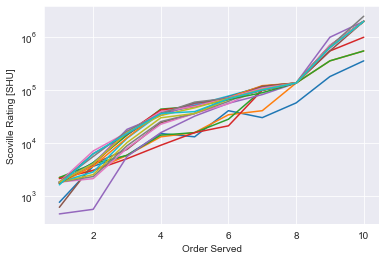

In [20]:
#n = len(df[df['Season']==1]['Scoville Rating (SHU)'])
n=len(df['Season'].unique())

for i in range(n):
    plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)'], label=r'Season'+str(i+1))


plt.yscale('log')
plt.ylabel('Scoville Rating [SHU]')
plt.xlabel('Order Served')
#plt.legend()
plt.show()

In [21]:
'''
season = 18
sns.regplot(x = df[df['Season']==season]['Order Served'], y = df[df['Season']==season]['Log10 Scoville Rating (SHU)'], label=r'Season'+str(season))
plt.legend()
'''

"\nseason = 18\nsns.regplot(x = df[df['Season']==season]['Order Served'], y = df[df['Season']==season]['Log10 Scoville Rating (SHU)'], label=r'Season'+str(season))\nplt.legend()\n"

In [22]:
labels = df['Order Served'].unique()
n = len(labels)
med_scov_per_order = 0.*np.arange(n)
mean_scov_per_order = 0.*np.arange(n)
std_scov_per_order = 0.*np.arange(n)

In [23]:
for i in range(n):
    med_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].median()
    mean_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].mean()
    std_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].std()

    #print('Order Served = ',i)
    #print('Mean =',df[df['Order Served']==i]['Scoville Rating (SHU)'].mean())
    #print('Median =',df[df['Order Served']==i]['Scoville Rating (SHU)'].median())
    #print('    ')

#med_scov_per_order

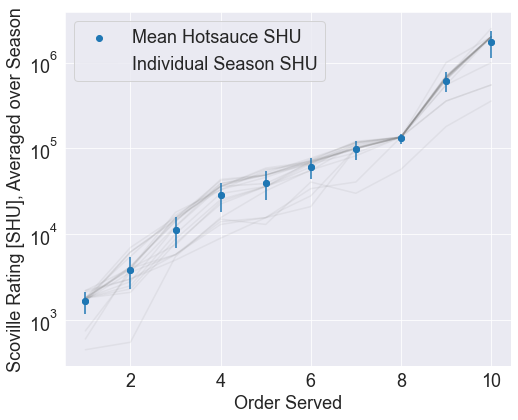

In [24]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(8,6.5))

n=len(df['Season'].unique())

#plot individual ones in background
for i in range(n):
    plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)'], alpha=0.1, color='tab:gray')#, label=r'Season'+str(i+1))

plt.scatter(labels, mean_scov_per_order, label='Mean Hotsauce SHU')#, label=r'Season'+str(i+1))
plt.errorbar(labels, mean_scov_per_order, yerr = std_scov_per_order, fmt ='o')
plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)'], 
         alpha=0.01, color='tab:gray', label='Individual Season SHU') #plot one for the legend label

#plt.title('Pizza')
plt.yscale('log')
plt.ylabel('Scoville Rating [SHU], Averaged over Season')
plt.xlabel('Order Served')
plt.legend()
plt.show()

In [25]:
df[df['Order Served']==8][['Hot Sauce','Season']]

Hot Sauce  Season
7    Dave's Gourmet Temporary Insanity Hot Sauce       1
17            Da' Bomb Beyond Insanity Hot Sauce       2
27            Da' Bomb Beyond Insanity Hot Sauce       3
37            Da' Bomb Beyond Insanity Hot Sauce       4
47            Da' Bomb Beyond Insanity Hot Sauce       5
57            Da' Bomb Beyond Insanity Hot Sauce       6
67            Da' Bomb Beyond Insanity Hot Sauce       7
77            Da' Bomb Beyond Insanity Hot Sauce       8
87            Da' Bomb Beyond Insanity Hot Sauce       9
97            Da' Bomb Beyond Insanity Hot Sauce      10
107           Da' Bomb Beyond Insanity Hot Sauce      11
117           Da' Bomb Beyond Insanity Hot Sauce      12
127           Da' Bomb Beyond Insanity Hot Sauce      13
137           Da' Bomb Beyond Insanity Hot Sauce      14
147           Da' Bomb Beyond Insanity Hot Sauce      15
157           Da' Bomb Beyond Insanity Hot Sauce      16
167           Da' Bomb Beyond Insanity Hot Sauce      17
177           Da' Bomb Beyond Insanity Hot Sauce      18
187           Da' Bomb Beyond Insanity Hot Sauce      19
197           Da' Bomb Beyond Insanity Hot Sauce      20

In [26]:
#sns.regplot(x = labels, y = np.log10(mean_scov_per_order))#, label= )

# What Peppers Are Most Common? - String Processing on Ingredients

In [27]:
'''
# string split each element by comma - not currently in use
ingr1 = df_ingr['Ingredients'][0]
words1 = [word.lower() for word in ingr1.split(', ')] 
'''

"\n# string split each element by comma - not currently in use\ningr1 = df_ingr['Ingredients'][0]\nwords1 = [word.lower() for word in ingr1.split(', ')] \n"

In [28]:
'''
#https://stackoverflow.com/questions/38715212/scikit-learn-extract-word-tokens-from-a-string-delimiter-using-countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

def tokenize(text):
    return([text.split('#', 1)[0].strip()])

text = ["first ques # on stackoverflow", "please help"]

vec = CountVectorizer(tokenizer=tokenize)
data = vec.fit_transform(text).toarray()
vocab = vec.get_feature_names()

vocab
'''

'\n#https://stackoverflow.com/questions/38715212/scikit-learn-extract-word-tokens-from-a-string-delimiter-using-countvectorizer\nfrom sklearn.feature_extraction.text import CountVectorizer\n\ndef tokenize(text):\n    return([text.split(\'#\', 1)[0].strip()])\n\ntext = ["first ques # on stackoverflow", "please help"]\n\nvec = CountVectorizer(tokenizer=tokenize)\ndata = vec.fit_transform(text).toarray()\nvocab = vec.get_feature_names()\n\nvocab\n'

In [29]:
'''
# gets the first entry before the comma - not currently in use
def tokenize(text):
    return([text.split(', ')[0].strip()])
'''

"\n# gets the first entry before the comma - not currently in use\ndef tokenize(text):\n    return([text.split(', ')[0].strip()])\n"

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
thecount=CountVectorizer()

In [31]:
ingr = df_ingr['Ingredients'].iloc[:].values
ingr = thecount.fit_transform(ingr)

In [32]:
cols = thecount.get_feature_names_out()
bow = pd.DataFrame(ingr.toarray(), columns = cols)
bow.head(5)

160000  202  211  28  30  acetic  acid  acidity  acids  added  ...  wine  \
0       0    0    0   0   0       0     0        0      0      0  ...     0   
1       0    0    0   0   0       0     0        0      0      0  ...     0   
2       0    0    0   0   0       0     0        0      0      0  ...     0   
3       0    0    0   0   0       0     0        0      0      0  ...     1   
4       0    0    0   0   0       0     0        0      0      0  ...     0   

   with  wood  worchestershire  xanthan  yeast  yellow  yuzu  zest  zing  
0     0     0                0        0      0       0     0     0     0  
1     0     0                0        0      0       0     0     0     0  
2     0     0                0        0      0       0     0     0     0  
3     0     0                0        0      1       0     0     0     0  
4     0     0                0        0      0       0     0     0     0  

[5 rows x 420 columns]

In [33]:
#get rid of number columns
cols = cols[5:]
bow = bow[cols]

In [34]:
bow[peppernames]

adobo  aji  aka  amarillo  anaheim  ancho  apollo  arbol  bell  bhut  \
0        0    0    0         0        0      0       0      0     0     0   
1        0    0    0         0        0      0       0      0     0     0   
2        0    0    0         0        0      0       0      0     0     0   
3        0    0    0         0        0      0       0      0     0     0   
4        0    0    0         0        0      0       0      0     0     0   
..     ...  ...  ...       ...      ...    ...     ...    ...   ...   ...   
130      0    0    0         0        0      0       0      0     0     1   
131      0    0    0         0        0      0       0      0     0     0   
132      0    0    0         0        0      0       0      0     0     0   
133      0    0    0         0        0      0       0      0     0     0   
134      0    0    0         0        0      0       0      0     0     0   

     ...  pot  primo  reaper  reapers  scorpion  scotch  serrano  sivathei  \
0    ...    0      0       0        0         1       0        0         0   
1    ...    0      0       0        0         1       0        0         0   
2    ...    0      0       0        0         0       0        0         0   
3    ...    0      0       0        0         0       0        0         0   
4    ...    0      0       0        0         0       0        0         0   
..   ...  ...    ...     ...      ...       ...     ...      ...       ...   
130  ...    0      0       0        0         0       0        0         0   
131  ...    0      0       0        0         0       0        0         0   
132  ...    1      0       1        0         1       0        0         0   
133  ...    0      0       0        0         1       0        0         0   
134  ...    0      0       0        0         0       0        1         0   

     tabasco  tepin  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  
..       ...    ...  
130        0      0  
131        0      0  
132        0      0  
133        0      1  
134        0      0  

[135 rows x 57 columns]

# What Peppers Are Most Common? - Counting Issues....
Peppers with two-word names, e.g. *bhut jolokia*, have been split. We want to combine these into one element.

Some peppers have been listed sometimes singular and sometimes plural, e.g. *jalapenos* and *jalapenos*. We want to combine these into one element.

Some peppers have *ñ* written as *n*, e.g. *jalapeno* and *jalapeño*. We want to combine these into one element.

In order to calculate the number of sauces that contain a certain pepper, we want to count a maximum number of 1 counts in any pepper row. Sometimes a pepper's name shows up more than once on a label, in two common ways:
1. jalapeno pepper mash (jalapenos, salt, vinegar...)
2. habanero peppers,..., habanero pepper extract,...

In [35]:
bhut = np.array(['bhut','jolokia', 'ghost']) #Ghost / Bhut Jolokia
choc = np.array(['chocolate', 'bhutlah']) #Chocolate Bhutlah
fijian = np.array(['fijian', 'bongo']) # fijian bongo
bonnet = np.array(['scotch', 'bonnet','bonnets']) # scotch bonnet
reaper = np.array(['carolina', 'reaper', 'reapers']) # carolina reaper
pot7 = np.array(['pot', 'douglah']) #7-pot / douglah
jalapeno = np.array(['jalapeno', 'jalapenos', 'jalapeño', 'jalapeños']) # jalapeno
habanero = np.array(['habanero', 'habaneros', 'habañero']) # habanero 
chipotle = np.array(['chipotle', 'chipolte', 'chipotles']) # chipotle

In [36]:
bow['bhut jolokia'] = bow[bhut].max(axis=1)
bow=bow.drop(bhut,axis=1)

bow['chocolate bhutlah'] = bow[choc].max(axis=1)
bow=bow.drop(choc,axis=1)

bow['fijian bongo'] = bow[fijian].max(axis=1)
bow=bow.drop(fijian,axis=1)

bow['scotch bonnet'] = bow[bonnet].max(axis=1)
bow=bow.drop(bonnet,axis=1)

bow['carolina reaper'] = bow[reaper].max(axis=1)
bow=bow.drop(reaper,axis=1)

bow['7-pot'] = bow[pot7].max(axis=1)
bow=bow.drop(pot7,axis=1)

bow['jalapeno'] = bow[jalapeno].max(axis=1)
bow=bow.drop(jalapeno[1:],axis=1)

bow['habanero'] = bow[habanero].max(axis=1)
bow=bow.drop(habanero[1:],axis=1)

bow['chipotle'] = bow[chipotle].max(axis=1)
bow=bow.drop(chipotle[1:],axis=1)

new_cols=bow.columns

In [37]:
#get rid of double+ peppers per hotsauce

bow_max1=bow.copy()

n_p = len(new_peppernames)
n_c = len(bow)
for j in range(n_c):
    for i in range(n_p):
        if bow_max1[new_peppernames[i]][j] > 1:
            #print(new_peppernames[i], " ", HotSauceNames[j], " check")
            bow_max1[new_peppernames[i]][j] = 1

In [38]:
nhot = len(HotSauceNames) #number of hotsauces

In [39]:
pepsum = bow_max1[new_peppernames].sum(axis=0)
d_pepper_sum = {'Pepper Names': new_peppernames, 'Total Occurances': pepsum, '% of Occurances': round(10*pepsum/nhot*100)/10}
ind = np.arange(len(pepsum))
pepper_sums = pd.DataFrame(data=d_pepper_sum)#,index=ind)
pepper_sums=pepper_sums.set_index(ind)

In [40]:
'''
plt.figure(figsize=(25,20))
plt.pie(pepper_sums['Total Occurances'], labels = pepper_sums['Pepper Names'])#, colors = colors, autopct='%.0f%%')
#plt.legend(labels = pepper_sums['Pepper Names'])
plt.show()

#https://github.com/plouc/nivo/issues/1378
'''

"\nplt.figure(figsize=(25,20))\nplt.pie(pepper_sums['Total Occurances'], labels = pepper_sums['Pepper Names'])#, colors = colors, autopct='%.0f%%')\n#plt.legend(labels = pepper_sums['Pepper Names'])\nplt.show()\n\n#https://github.com/plouc/nivo/issues/1378\n"

In [41]:
'''
# find most popular occurances, and rare occurances
nmax = 5
pepper_sums_common = pepper_sums[pepper_sums['Total Occurances'] > nmax]
pepper_sums_uncommon = pepper_sums[pepper_sums['Total Occurances'] <= nmax]
'''

"\n# find most popular occurances, and rare occurances\nnmax = 5\npepper_sums_common = pepper_sums[pepper_sums['Total Occurances'] > nmax]\npepper_sums_uncommon = pepper_sums[pepper_sums['Total Occurances'] <= nmax]\n"

# What Peppers Are Most Common

In [42]:
pepper_sums.sort_values(by=['Total Occurances'], ascending=False).head(6)

Pepper Names  Total Occurances  % of Occurances
24         habanero                46             34.1
10     bhut jolokia                34             25.2
35         scorpion                22             16.3
26         jalapeno                20             14.8
14  carolina reaper                19             14.1
17         chipotle                15             11.1

In [43]:
'''
#sauces_with_habanero =  .iloc[:].values

sauces_with_habanero = pepper_sums[pepper_sums['Pepper Names']=='habanero']['% of Occurances'].iloc[:].values
sauces_without_habanero = 100. - sauces_with_habanero

plt.figure(figsize=(10,8))
plt.pie([sauces_with_habanero[0], sauces_without_habanero[0]], labels = ['Sauces with Habanero','Sauces without Habanero'], colors = sns.color_palette('rocket'), shadow = True)#, autopct='%.0f%%')
#plt.legend(labels = pepper_sums['Pepper Names'])
plt.show()
'''

"\n#sauces_with_habanero =  .iloc[:].values\n\nsauces_with_habanero = pepper_sums[pepper_sums['Pepper Names']=='habanero']['% of Occurances'].iloc[:].values\nsauces_without_habanero = 100. - sauces_with_habanero\n\nplt.figure(figsize=(10,8))\nplt.pie([sauces_with_habanero[0], sauces_without_habanero[0]], labels = ['Sauces with Habanero','Sauces without Habanero'], colors = sns.color_palette('rocket'), shadow = True)#, autopct='%.0f%%')\n#plt.legend(labels = pepper_sums['Pepper Names'])\nplt.show()\n"

([<matplotlib.patches.Wedge at 0x7f9f4d3065b0>,
 [Text(0.2850718163776404, 1.0624189660897216, 'Chipotle'),
  Text(-0.28507181637764123, -1.0624189660897214, '')],
 [Text(0.15549371802416748, 0.5795012542307572, '11%'),
  Text(-0.15549371802416792, -0.579501254230757, '89%')])

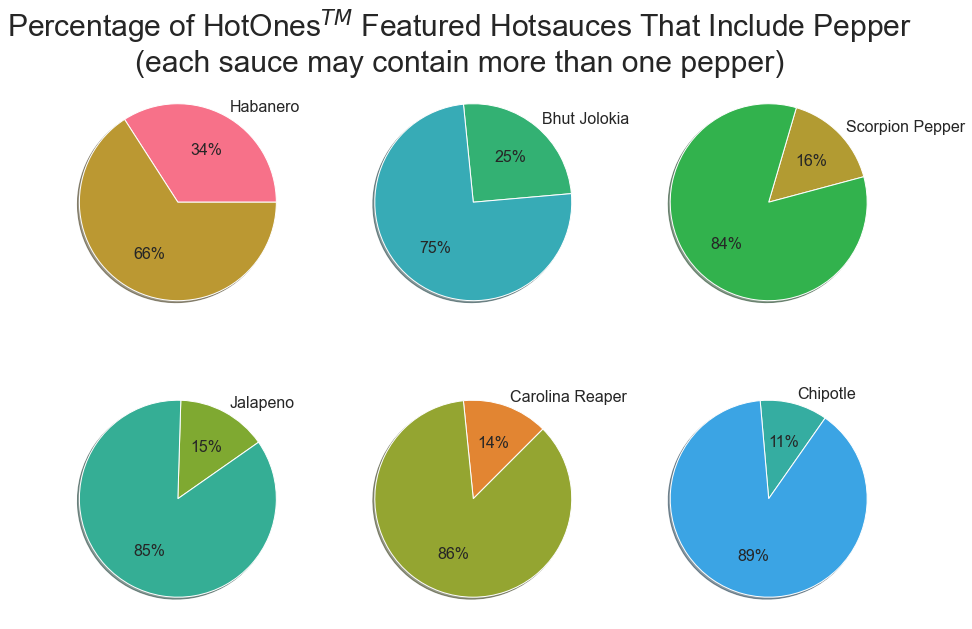

In [44]:
from textwrap import wrap

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, facecolor='#e8f4f0')
#fig.delaxes(ax=axes[0,1])
#fig.delaxes(ax=axes[1,1])
#sns.color_palette('husl')

fig.suptitle("\n".join(wrap(r'Percentage of HotOnes$^{TM}$ Featured Hotsauces That Include Pepper (each sauce may contain more than one pepper)')),
             fontsize=30)

sauces_with_habanero = pepper_sums[pepper_sums['Pepper Names']=='habanero']['% of Occurances'].iloc[:].values
axes[0,0].pie([sauces_with_habanero[0], 100. - sauces_with_habanero[0]], labels = ['Habanero',''], 
        colors = sns.husl_palette(), shadow = True, autopct='%.0f%%')

sauces_with_bhut = pepper_sums[pepper_sums['Pepper Names']=='bhut jolokia']['% of Occurances'].iloc[:].values
axes[0,1].pie([sauces_with_bhut[0], 100. - sauces_with_bhut[0]], labels = ['Bhut Jolokia',''], 
        colors = sns.husl_palette(h=0.4), shadow = True, autopct='%.0f%%', startangle=5)

sauces_with_scorpion = pepper_sums[pepper_sums['Pepper Names']=='scorpion']['% of Occurances'].iloc[:].values
axes[0,2].pie([sauces_with_scorpion[0], 100. - sauces_with_scorpion[0]], labels = ['Scorpion Pepper',''], 
        colors = sns.husl_palette(h=0.2), shadow = True, autopct='%.0f%%', startangle=15)

sauces_with_jalapeno = pepper_sums[pepper_sums['Pepper Names']=='jalapeno']['% of Occurances'].iloc[:].values
axes[1,0].pie([sauces_with_jalapeno[0], 100. - sauces_with_jalapeno[0]], labels = ['Jalapeno',''], 
        colors = sns.husl_palette(h=0.3), shadow = True, autopct='%.0f%%', startangle=35)

sauces_with_reaper = pepper_sums[pepper_sums['Pepper Names']=='carolina reaper']['% of Occurances'].iloc[:].values
axes[1,1].pie([sauces_with_reaper[0], 100. - sauces_with_reaper[0]], labels = ['Carolina Reaper',''], 
        colors = sns.husl_palette(h=0.1), shadow = True, autopct='%.0f%%', startangle=45)

sauces_with_chipotle = pepper_sums[pepper_sums['Pepper Names']=='chipotle']['% of Occurances'].iloc[:].values
axes[1,2].pie([sauces_with_chipotle[0], 100. - sauces_with_chipotle[0]], labels = ['Chipotle',''], 
        colors = sns.husl_palette(h=0.5), shadow = True, autopct='%.0f%%', startangle=55)

#fig.delaxes(ax=axes[1,1])
#perc_bv = sum(bv)/nhot
#axes[1,1].pie([perc_bv, 1.-perc_bv], labels = ['Balsamic Vinegar',''], 
#        colors = sns.color_palette('viridis'), autopct='%.0f%%', shadow = True, startangle=45)#, labeldistance=0.5)

In [45]:
'''
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

print("Pie Chart doesn't tell the story I want")

plt.figure(figsize=(25,20))
#plt.pie(pepper_sums_common['Total Occurances'], labels = pepper_sums_common['Pepper Names'], colors = sns.color_palette('tab20'), shadow = True)#, autopct='%.0f%%')
plt.pie(pepper_sums_common['Total Occurances'], labels = pepper_sums_common['Pepper Names'], colors = sns.color_palette('tab20'), shadow = True)#, autopct='%.0f%%')
#plt.legend(labels = pepper_sums['Pepper Names'])
plt.show()
'''

'''
print("Pie Chart doesn't tell the story I want")

plt.figure(figsize=(25,20))
plt.pie(pepper_sums_uncommon['Total Occurances'], labels = pepper_sums_uncommon['Pepper Names'], colors = sns.color_palette('tab20'), shadow = True)#, colors = colors, autopct='%.0f%%')
#plt.legend(labels = pepper_sums['Pepper Names'])
plt.show()
'''

'\nprint("Pie Chart doesn\'t tell the story I want")\n\nplt.figure(figsize=(25,20))\nplt.pie(pepper_sums_uncommon[\'Total Occurances\'], labels = pepper_sums_uncommon[\'Pepper Names\'], colors = sns.color_palette(\'tab20\'), shadow = True)#, colors = colors, autopct=\'%.0f%%\')\n#plt.legend(labels = pepper_sums[\'Pepper Names\'])\nplt.show()\n'

# White Vinegar vs. Apple Cider Vinegar

#### Sorting Issues...

*apple, cider, vinegar* all separated

Sometimes only ingredient is *vinegar* - assume in these cases *white*

Count *distilled vinegar* as *white*.

Occasional variations, *wine vinegar*, *balsamic vinegar*,...

*apple* and *cider* nearly always show up together, at least one case where just "cider" vinegar is present

*Vinegar* might show up more than once if used in a 'mash', which is sometimes a pre-sauce or mixture.

In [46]:
bow_wnames = bow.copy()
bow_wnames = bow.set_index(HotSauceNames)

In [47]:
#check each sauce, is there apple cider vinegar? - both "cider" and at least 1 "vinegar"
nhot = len(HotSauceNames)
acv = 0.*bow_wnames['cider'].iloc[:].values.copy() #apple cider vinegar
rwv = 0.*bow_wnames['wine'].iloc[:].values.copy() #red wine vinegar
bv = 0.*bow_wnames['balsamic'].iloc[:].values.copy() #balsamic vinegar
wdv = 0.*bow_wnames['balsamic'].iloc[:].values.copy() #white distilled vinegar

In [48]:
for i in range(nhot):
    n_acv = bow_wnames['cider'][i]
    if n_acv > 0:
        acv[i] = 1.
    n_rwv = bow_wnames['wine'][i]
    if n_rwv > 0:
        rwv[i] = 1.
    n_bv = bow_wnames['balsamic'][i]
    if n_bv > 0:
        bv[i] = 1.
    nv = bow_wnames['vinegar'][i]
    if nv > 0:
        wdv[i] = nv - bv[i] - rwv[i] - acv[i] #make sure to remove other vinegars
        if wdv[i] > 1: #sometimes white vinegar still shows up more than once
            wdv[i] = 1
        if wdv[i] < 1: #a few cases this goes negative, I haven't had a chance to look into the whys
            wdv[i] = 0
   

In [49]:
'''
perc_acv = sum(acv)/nhot

plt.figure(figsize=(10,8))
plt.pie([perc_acv, 1.-perc_acv], labels = ['Sauces with Apple Cider Vinegar','Sauces without Apple Cider Vinegar'], colors = sns.color_palette('mako'), shadow = True)#, autopct='%.0f%%')
#plt.legend(labels = pepper_sums['Pepper Names'])
plt.show()
'''

"\nperc_acv = sum(acv)/nhot\n\nplt.figure(figsize=(10,8))\nplt.pie([perc_acv, 1.-perc_acv], labels = ['Sauces with Apple Cider Vinegar','Sauces without Apple Cider Vinegar'], colors = sns.color_palette('mako'), shadow = True)#, autopct='%.0f%%')\n#plt.legend(labels = pepper_sums['Pepper Names'])\nplt.show()\n"

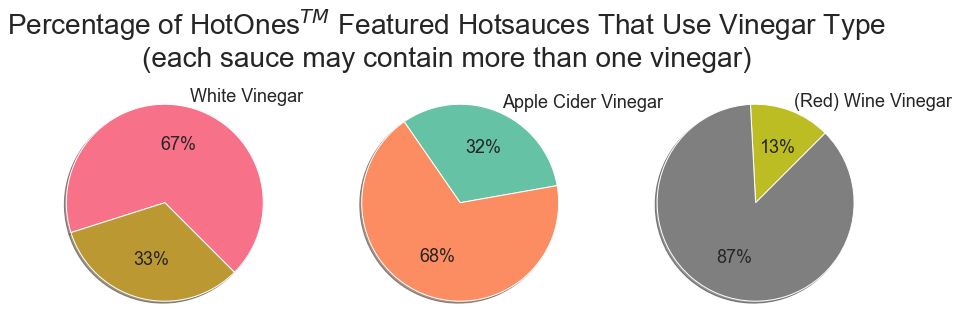

In [50]:
plt.rcParams.update({'font.size': 18})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, facecolor='#e8f4f0')
#fig.delaxes(ax=axes[0,1])
#fig.delaxes(ax=axes[1,1])

fig.suptitle("\n".join(wrap(r'Percentage of HotOnes$^{TM}$ Featured Hotsauces That Use Vinegar Type (each sauce may contain more than one vinegar)')),
             fontsize=28)

perc_wdv = sum(wdv)/nhot
axes[0,0].pie([perc_wdv, 1.-perc_wdv], labels = ['White Vinegar',''], 
        colors = sns.color_palette('husl'), shadow = True, autopct='%.0f%%', startangle=-45)


perc_acv = sum(acv)/nhot
axes[0,1].pie([perc_acv, 1.-perc_acv], labels = ['Apple Cider Vinegar',''], 
        colors = sns.color_palette('Set2'), shadow = True, autopct='%.0f%%', startangle=10)

perc_rwv = sum(rwv)/nhot
axes[0,2].pie([perc_rwv, 1.-perc_rwv], labels = ['(Red) Wine Vinegar',''], 
        colors = sns.color_palette("tab10_r"), shadow = True, autopct='%.0f%%', startangle=45)


fig.delaxes(ax=axes[1,0])
fig.delaxes(ax=axes[1,1])
fig.delaxes(ax=axes[1,2])
#perc_bv = sum(bv)/nhot
#axes[1,1].pie([perc_bv, 1.-perc_bv], labels = ['Balsamic Vinegar',''], 
#        colors = sns.color_palette('viridis'), autopct='%.0f%%', shadow = True, startangle=45)#, labeldistance=0.5)#, autopct='%.0f%%')

# More questions to investigate:

Sweetener vs. Fruit/Fruits, which kinds?

Xanthum Gum?

*maybe* preservatives

rarest ingredients? most common?